In [7]:
import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

from brian2 import *
import Documentation.parameters as p
import Backward as back
import matplotlib.pyplot as plt
import pandas as pd

defaultclock = p.dt*ms


In [8]:
scales  = [17,19,21,23]
weights = [3,5,7,9,11,13,15]

In [9]:
scales  = [17,21,23]
weights = [5,10,15]
delay = [0.1,0.4]

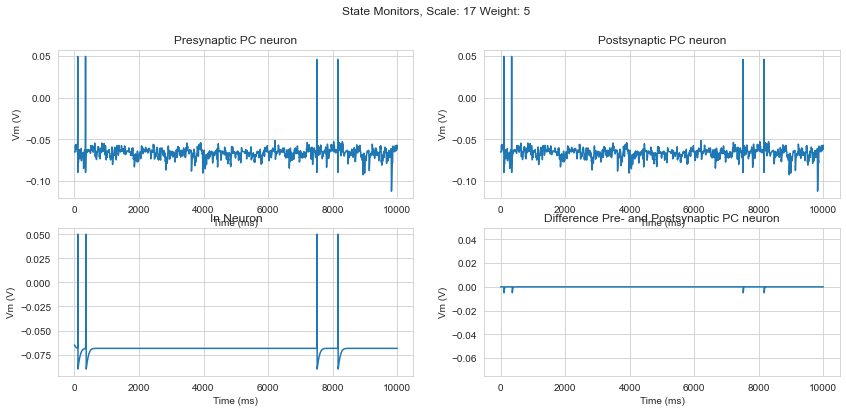

no down spikes, inventing one


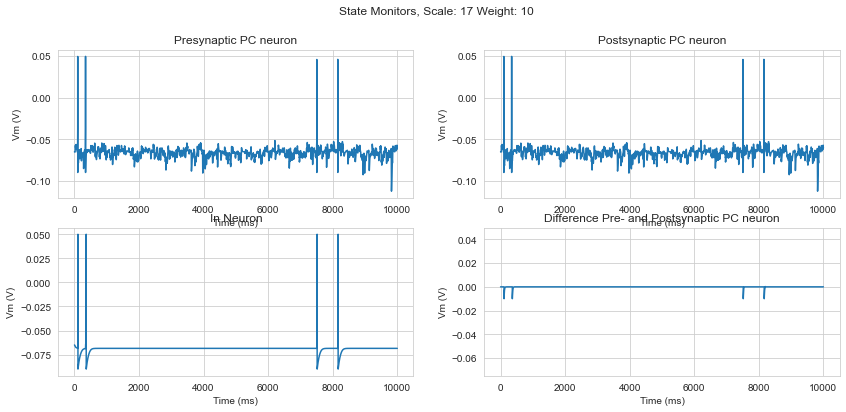

no down spikes, inventing one


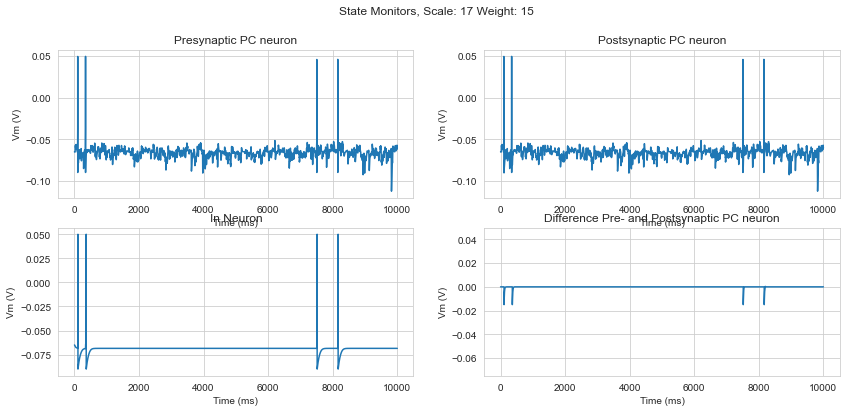

no down spikes, inventing one


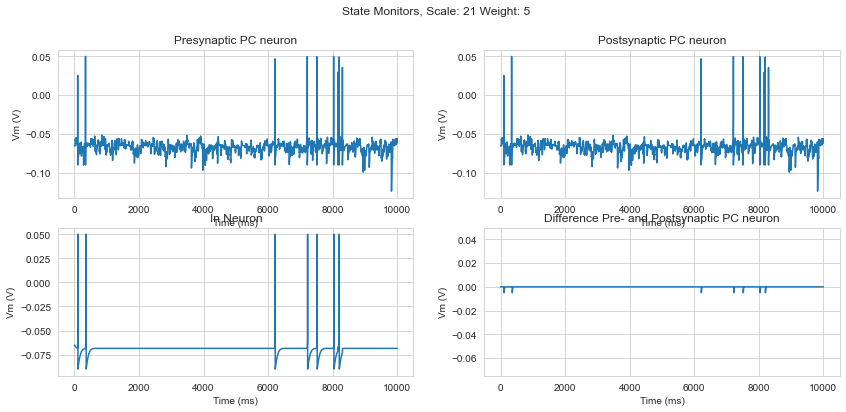

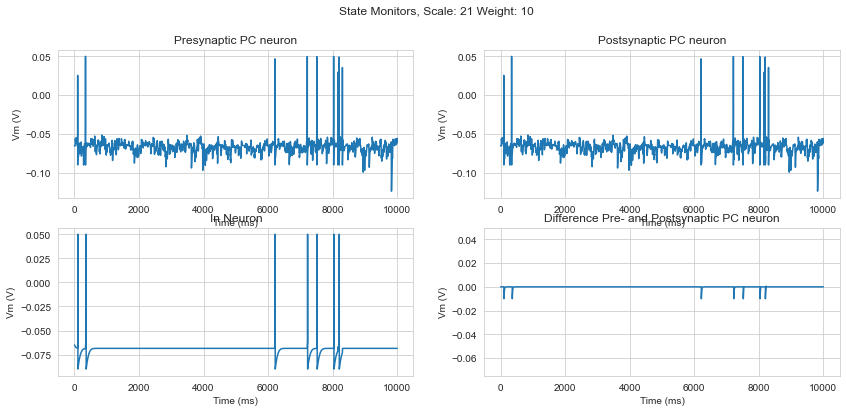

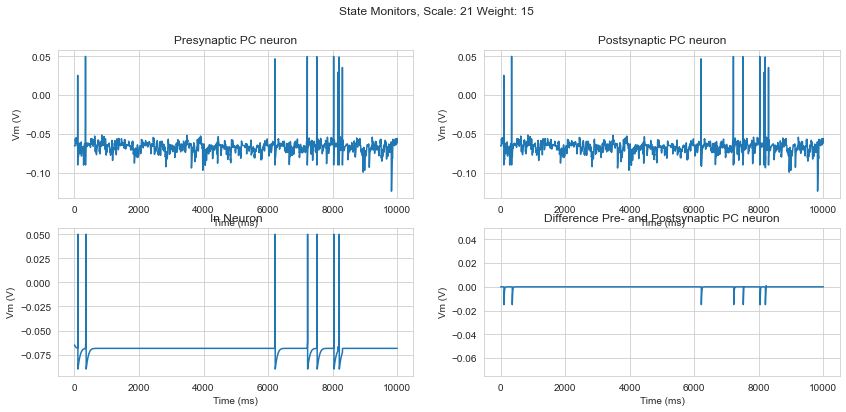

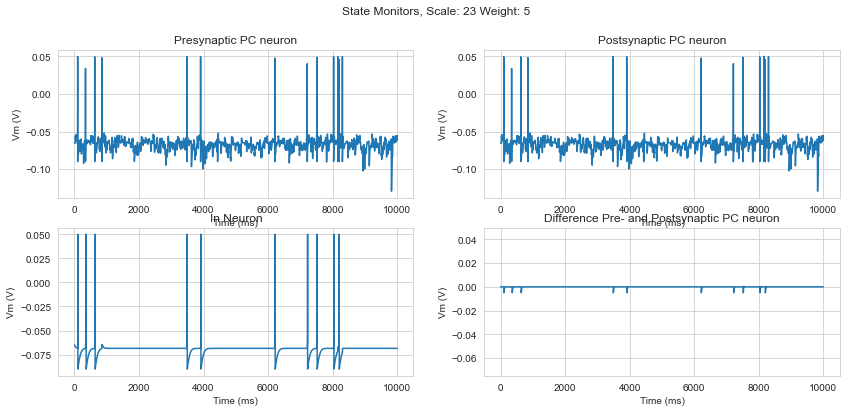

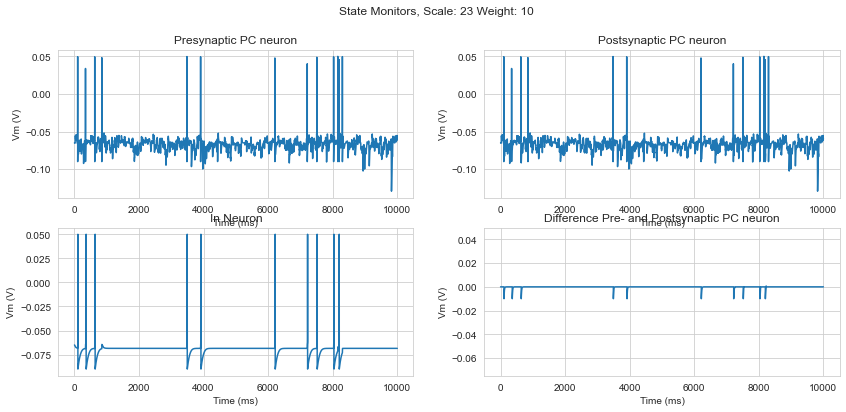

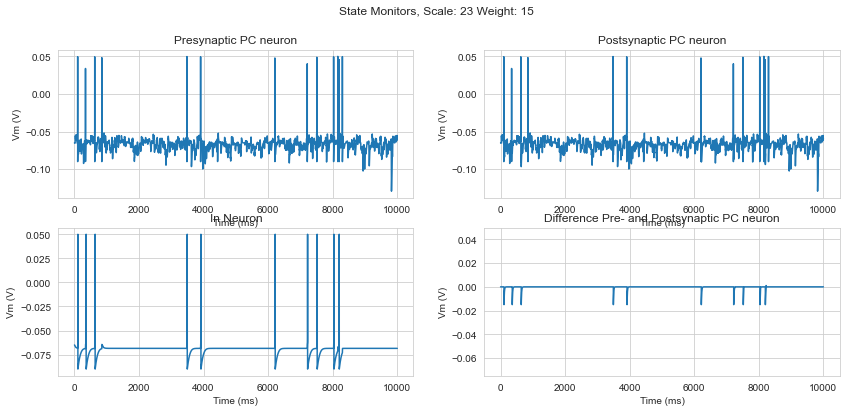

In [10]:
data = pd.DataFrame()
spikes = []
for scale in scales:
    output, spiketrain = back.backward_run(scale, weights, delay, p.seed)
    output.replace(r'\\n', ' ', regex= True)
    data = pd.concat([data, output])
    spikes.append(np.sum(spiketrain))

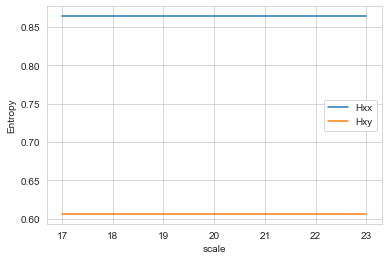

In [11]:
plt.figure()
plt.plot(data['weights'], data['Hxx'], label='Hxx')
plt.plot(data['weights'], data['Hxy'], label='Hxy')
#plt.plot(data['weights'], max_spikes, label = 'spikes')
plt.xlabel('scale')
plt.ylabel('Entropy')
plt.legend()
plt.show()

In [12]:
plt.figure()
plt.plot(scales, max_spikes, label='spikes')
plt.xlabel('scale')
plt.ylabel('Entropy')
plt.legend()
plt.show()

NameError: name 'max_spikes' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
scales  = [17,21,23]
weights = [5,10,15]
delays = [[0.,i*0.1] for i in range(0,20,2)]

# Testing the delays of the network

In [ ]:
data = pd.DataFrame()
spikes = []
for delay in delays:
    output, spiketrain = back.backward_run(21, weights, delay, p.seed)
    output.replace(r'\\n', ' ', regex= True)
    data = pd.concat([data, output])
    spikes.append(np.sum(spiketrain))

In [ ]:
x = data_PC['weights']
y = data_PC['scales']
z = data_PC['MI']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y,
                     linewidths=1, alpha=.7,
                     edgecolor='k',
                     s = 200,
                     c=z)

ax.set_xlabel('Inhibition')
ax.set_ylabel('scale')

ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

ax.legend(*scatter.legend_elements(num=10), loc='center right', bbox_to_anchor=(1.25, 0.5), title="MI")

plt.show()